# company- Genius AI Solutions

## Name- Priyanko Mistri

In [124]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('taskdata.csv')

In [125]:
df.describe(include='all')

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


In [126]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

In [127]:
print(df.isnull().sum())

user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64


In [128]:
print(df['account_id'].value_counts())
print('\n',df['account_id'].nunique(), ' types of account_id')
df['account_id'].fillna(df['account_id'].mode()[0], inplace=True)

1005.0    684
493.0     483
499.0     467
496.0     467
262.0     438
1017.0    436
113.0     290
226.0     275
111.0     248
112.0     148
364.0     134
517.0     112
202.0     111
115.0      73
116.0      34
Name: account_id, dtype: int64

 15  types of account_id


# Exploratory Data Analysis

## Outliers removal

<AxesSubplot:xlabel='avg_used_vas_value'>

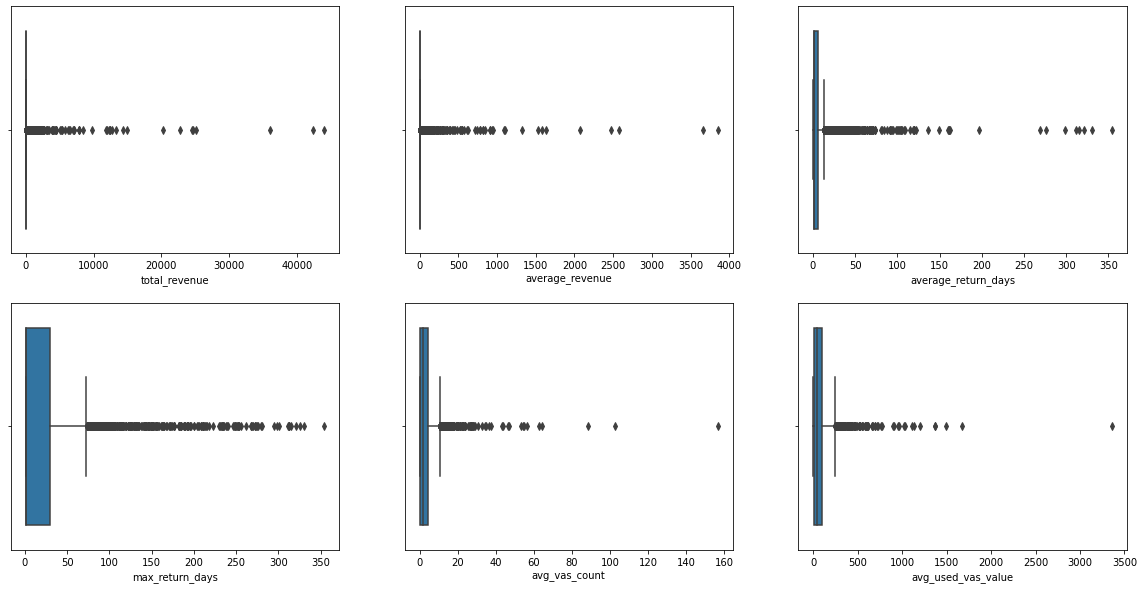

In [129]:
import matplotlib.pyplot as plt
fig,((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(df['total_revenue'], ax=ax0)
sns.boxplot(df['average_revenue'], ax=ax1)
sns.boxplot(df['average_return_days'], ax=ax2)
sns.boxplot(df['max_return_days'], ax=ax3)
sns.boxplot(df['avg_vas_count'], ax=ax4)
sns.boxplot(df['avg_used_vas_value'], ax=ax5)

<AxesSubplot:xlabel='avg_new_ads'>

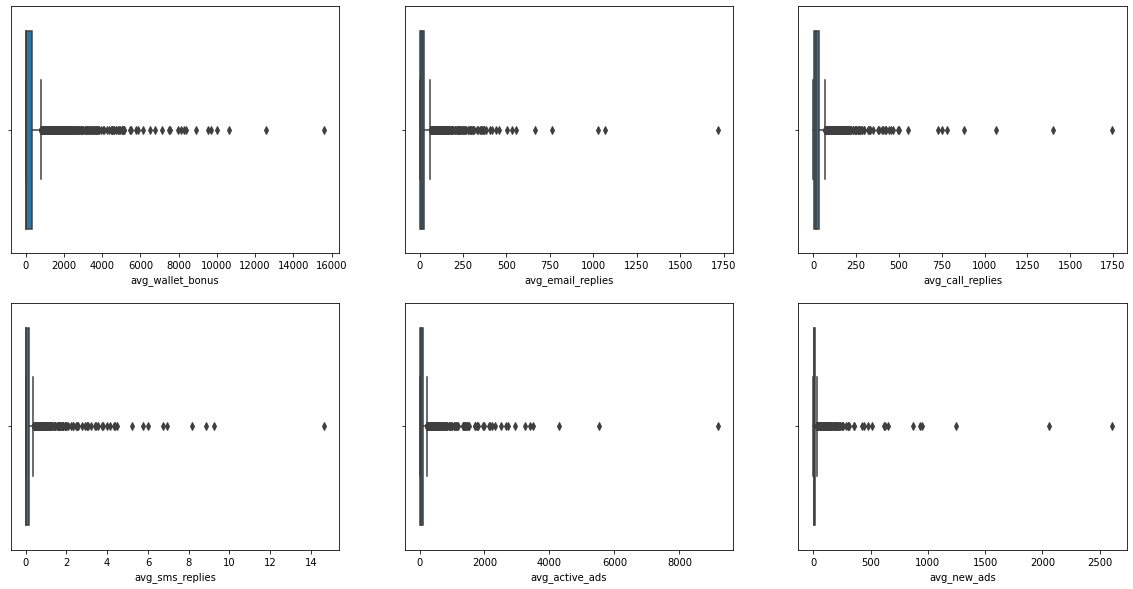

In [130]:
df = df[df['total_revenue']<30000]
df = df[df['average_revenue']<3000]
df = df[df['average_return_days']<200]
df = df[df['avg_vas_count']<80]
df = df[df['avg_used_vas_value']<2000]
fig,((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(df['avg_wallet_bonus'], ax=ax0)
sns.boxplot(df['avg_email_replies'], ax=ax1)
sns.boxplot(df['avg_call_replies'], ax=ax2)
sns.boxplot(df['avg_sms_replies'], ax=ax3)
sns.boxplot(df['avg_active_ads'], ax=ax4)
sns.boxplot(df['avg_new_ads'], ax=ax5)

In [131]:
df = df[df['avg_wallet_bonus']<12000]
df = df[df['avg_email_replies']<600]
df = df[df['avg_call_replies']<600]
df = df[df['avg_sms_replies']<10]
df = df[df['avg_active_ads']<4000]
df = df[df['avg_new_ads']<1500]
pd.crosstab(df['business_type'], df['target'])

target,0,1
business_type,,
0,3099,361
1,433,24
2,20,29
3,182,16
4,49,5
5,147,17


In [132]:
df_c = df.copy()

# Data Visualisation

Text(0.5, 1.0, 'user leaves')

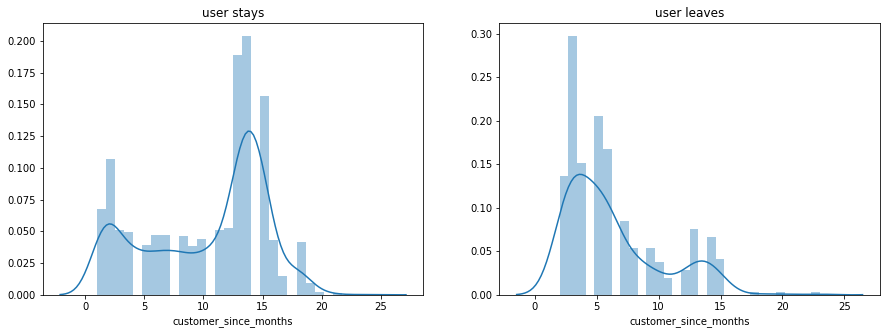

In [133]:
fig,axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df_c['customer_since_months'][df_c['target']==0], bins=30, ax=axes[0])
axes[0].set_title('user stays')
sns.distplot(df_c['customer_since_months'][df_c['target']==1], bins=30, ax=axes[1])
axes[1].set_title('user leaves')

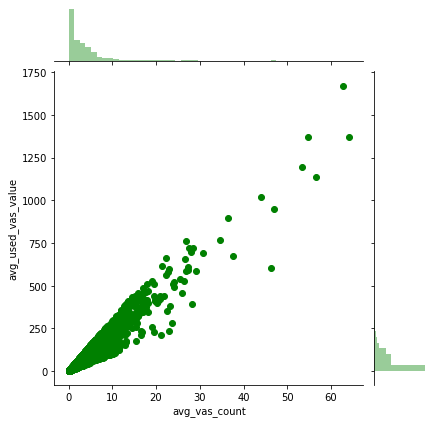

In [134]:
sns.jointplot(x = df_c['avg_vas_count'], y = df_c['avg_used_vas_value'], kind='scatter', color='green')

### 'avg_vas_count' and 'avg_used_vas_value' are highly collinear.

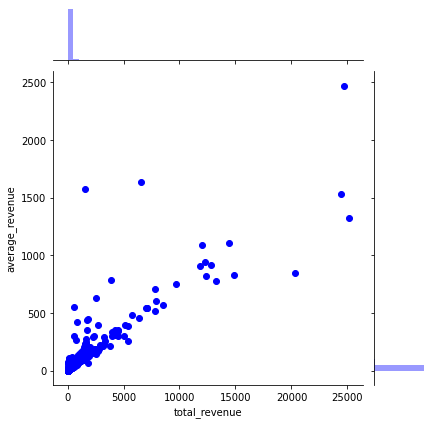

In [135]:
sns.jointplot(x = df_c['total_revenue'], y = df_c['average_revenue'], kind='scatter', color='blue')

### 'total_revenue' by user and 'average_revenue' are collinear.

<AxesSubplot:xlabel='max_return_days'>

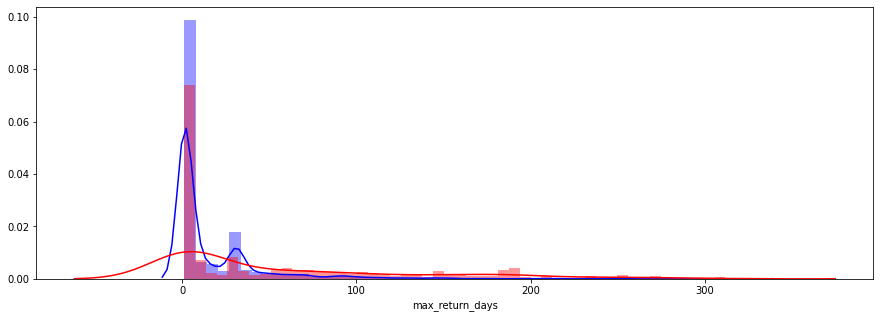

In [136]:
plt.figure(figsize=(15,5))      
sns.distplot(df_c['max_return_days'][df_c['target']==0], bins=50, color='blue')
sns.distplot(df_c['max_return_days'][df_c['target']==1], bins=50, color='red')

Text(0.5, 1.0, 'user leaves')

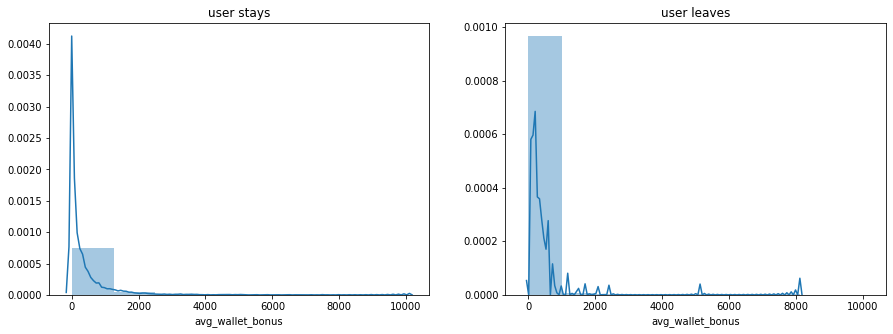

In [137]:
fig,axes = plt.subplots(1,2, figsize=(15,5), sharex=True)
sns.distplot(df_c['avg_wallet_bonus'][df_c['target']==0], bins=8, ax=axes[0])
axes[0].set_title('user stays')
sns.distplot(df_c['avg_wallet_bonus'][df_c['target']==1], bins=8, ax=axes[1])
axes[1].set_title('user leaves')

### leaving customer have small peaks at aroud 2000,5000 and 8000 it means leaving_user have more wallet_cash.

<AxesSubplot:xlabel='target', ylabel='average_revenue'>

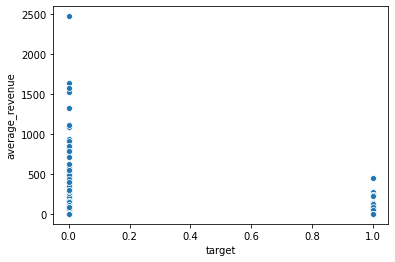

In [138]:
sns.scatterplot( x=df_c['target'] ,y = df_c['average_revenue'])

Text(0.5, 1.0, 'user leaves')

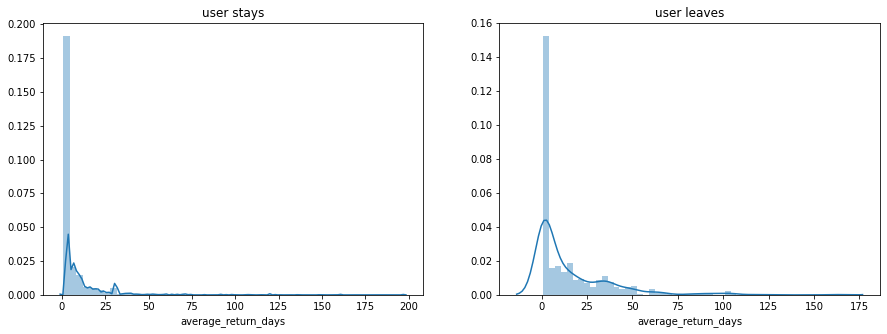

In [139]:
fig,axes = plt.subplots(1,2, figsize=(15,5)) 
sns.distplot(df_c['average_return_days'][df_c['target']==0], bins=50, ax=axes[0])
axes[0].set_title('user stays')
sns.distplot(df_c['average_return_days'][df_c['target']==1], bins=50, ax=axes[1])
axes[1].set_title('user leaves')

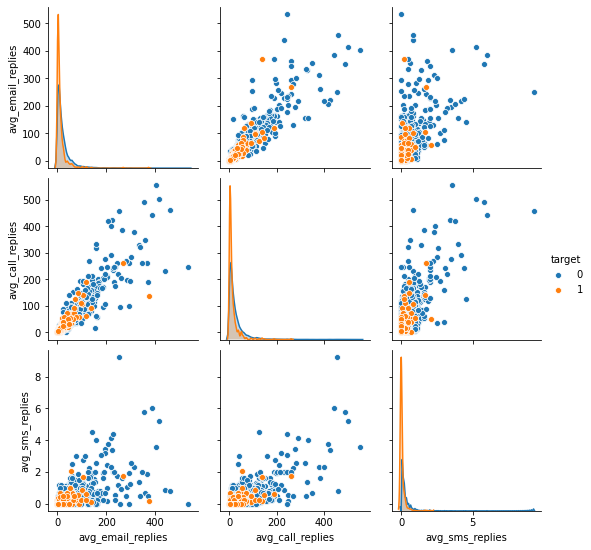

In [140]:
sns.pairplot(df_c[['avg_email_replies','avg_call_replies', 'avg_sms_replies','target']], hue='target')

<AxesSubplot:>

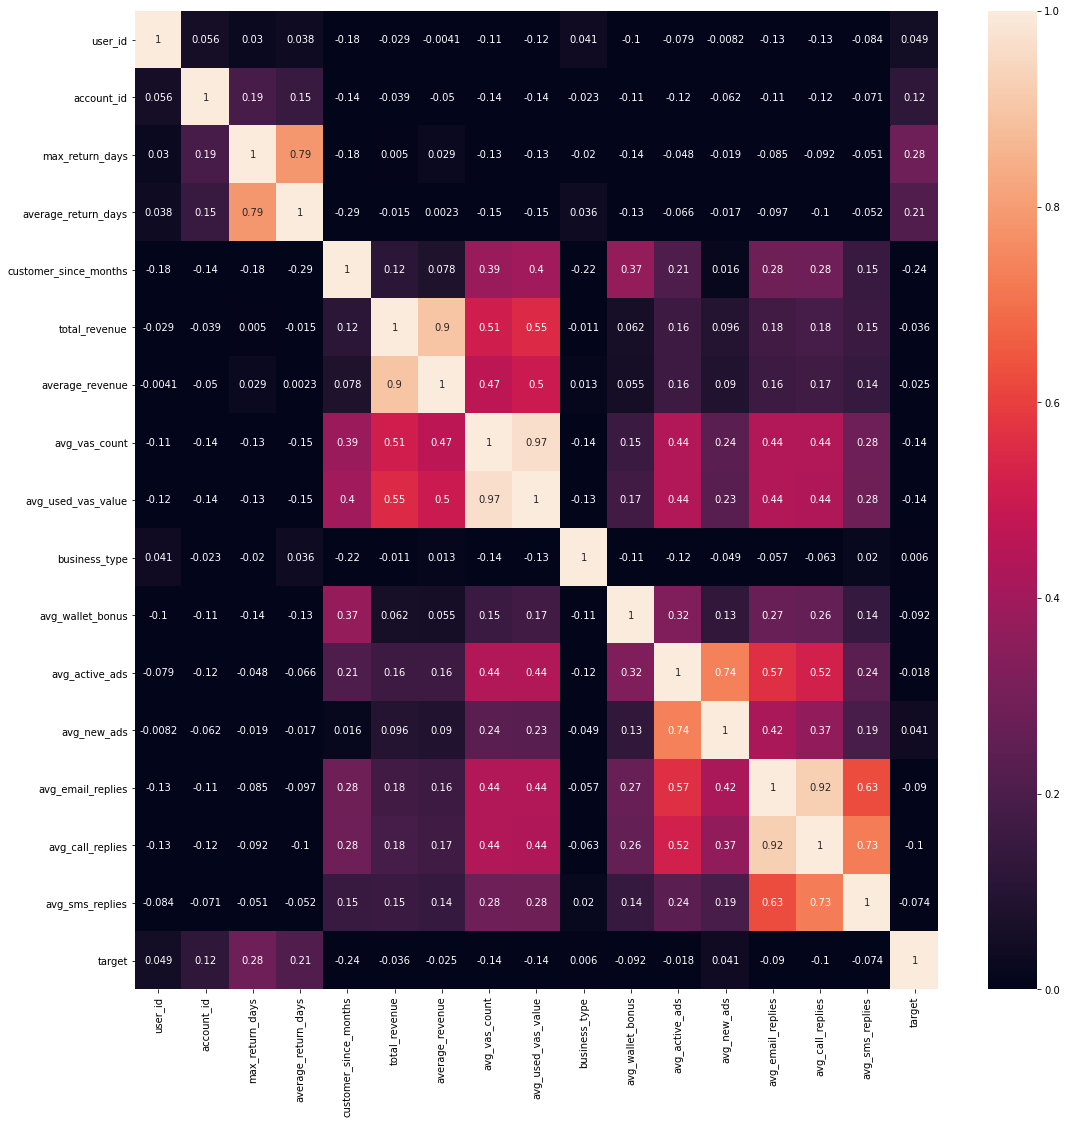

In [141]:
plt.figure(figsize=(18,18))
sns.heatmap(df_c.corr(), annot=True, vmin=0 , vmax=1)

In [142]:
df_c.drop('user_id', axis=1, inplace=True )
df_c.drop([ 'avg_vas_count', 'avg_email_replies', 'total_revenue'], axis=1, inplace=True)

In [143]:
x = df_c.iloc[:,:-1]
y = df_c.iloc[:,-1]
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=44)
x_res, y_res = smk.fit_sample(x,y)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_res = ss.fit_transform(x_res)
x_res = pd.DataFrame(x_res, columns=['account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'average_revenue', 'avg_used_vas_value',
       'business_type', 'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_call_replies', 'avg_sms_replies'])
y_res = pd.Series(y_res, name='target')

# Machine Learning

#### Here we are going with XGBoosting.

In [ ]:
from sklearn.model_selection import train_test_split,  GridSearchCV, RandomizedSearchCV
x_train,x_test, y_train,y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=44)
x_train,x_val, y_train,y_val = train_test_split(x_train, y_train, test_size=1547/6187, random_state=44)
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
def report(x,y):
    print('roc auc of model is : ', roc_auc_score(x,y))
    print('\n classification report \n: ', classification_report(x,y))
    print('\n confusion matrix : \n ', confusion_matrix(x,y))
    print('\n accuracy  : ', accuracy_score(x,y))
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(seed=0)

param_grid = {'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,5,7],
             'n_estimators':[100,200,300]}

gscv = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy' , verbose=1)
gscv.fit(x_train,y_train)
print(gscv.best_params_)    

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
xgb = XGBClassifier(**gscv.best_params_)
model = xgb.fit(x_train,y_train)
report(model.predict(x_train), y_train)

In [ ]:
report(model.predict(x_val), y_val)

In [ ]:
from sklearn.metrics import roc_curve
def plot_train_val(pred,act, x,y):
    fpr, tpr,thres = roc_curve(act , pred)
    fpr1, tpr1,thres1 = roc_curve(x , y)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label='train')
    plt.plot(fpr1,tpr1, label='validation')
    plt.plot([0,1], [0,1], '--', label='Random-Classifier')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('AUC-ROC curve')
    plt.legend()
plot_train_val(model.predict(x_train), y_train, model.predict(x_val), y_val)

In [ ]:
predictions = model.predict(x_test)
report(predictions, y_test)

# SHAP

In [ ]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

In [ ]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(model).expected_value, shap_values[0,:], x_test.iloc[0,:])